In [ ]:
import tensorflow as tf
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
IMAGE_SIZE=256
BATCH_SIZE=32
CHANNELS=3
EPOCHS=20

In [ ]:
data=tf.keras.preprocessing.image_dataset_from_directory(("/content/drive/MyDrive/data set"),
seed=123,
shuffle=True,
image_size=(IMAGE_SIZE,IMAGE_SIZE),
batch_size=BATCH_SIZE
)

Found 3373 files belonging to 5 classes.


In [ ]:
class_names=data.class_names
class_names

['Insect',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Virus']

In [ ]:
len(data)

106

In [ ]:
for image_batch,label_batch in data.take(1):
  print(image_batch.shape)
  print(label_batch.numpy())

(32, 256, 256, 3)
[2 2 4 0 1 4 2 4 2 4 2 1 0 1 1 1 3 2 4 1 2 3 1 1 1 4 2 4 0 4 2 1]


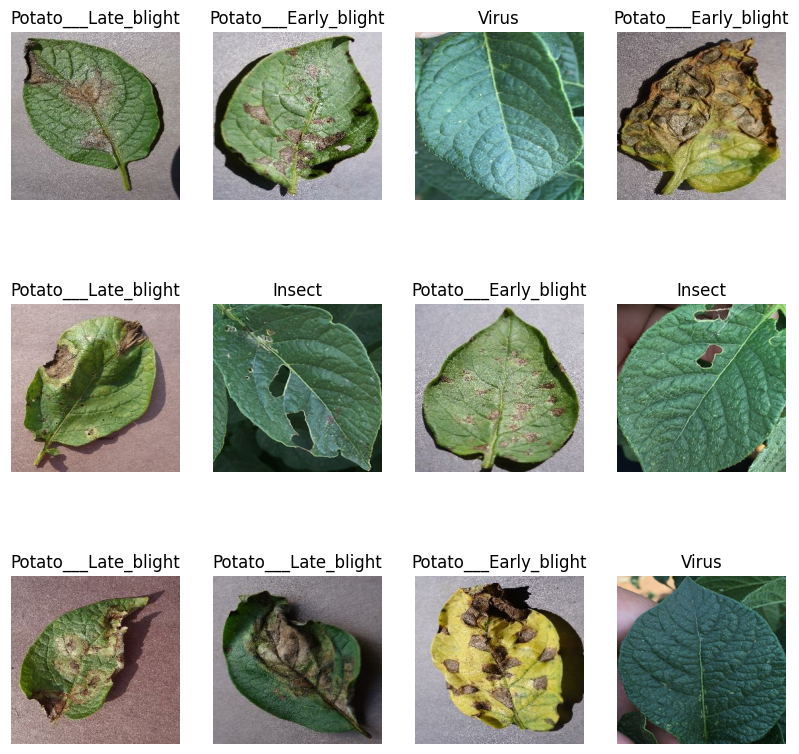

In [ ]:
plt.figure(figsize=(10,10))
for image_batch,label_batch in data.take(1):
  for i in range(12):
    ax=plt.subplot(3,4,i+1)
    plt.imshow(image_batch[i].numpy().astype("uint8"))
    plt.title(class_names[label_batch[i]])
    plt.axis("off")

In [ ]:
len(data)

106

In [ ]:
train_size=0.8 #because training data is 80%
len(data)*train_size

84.80000000000001

In [ ]:
train_ds=data.take(54)
len(train_ds)

54

In [ ]:
test_ds=data.skip(54)
len(test_ds)

52

In [ ]:
val_size=0.1
len(data)*val_size

10.600000000000001

In [ ]:
val_ds=test_ds.take(6)
len(val_ds)

6

In [ ]:
test_ds=test_ds.skip(6)
len(test_ds)

46

In [ ]:
def get_data_partitions_tf(ds,train_split=0.8,val_split=0.1,test_split=0.1,shuffle=True,shuffle_size=10000):
  assert (train_split + test_split + val_split) == 1
  ds_size=len(ds)
  if shuffle:
    ds=ds.shuffle(shuffle_size,seed=12)
  train_size=int(train_split*ds_size)
  val_size=int(val_split*ds_size)
  train_ds=ds.take(train_size)
  val_ds=ds.skip(train_size).take(val_size)
  test_ds=ds.skip(train_size).skip(val_size)
  return train_ds,val_ds,test_ds

In [ ]:
train_ds,val_ds,test_ds=get_data_partitions_tf(data)

In [ ]:
len(train_ds)

84

In [ ]:
len(val_ds)

10

In [ ]:
len(test_ds)

12

In [ ]:
train_ds=train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds=val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds=test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [ ]:
resize_and_rescale=tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE,IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [ ]:
data_agumentation=tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2),
])

In [ ]:
input_shape=(BATCH_SIZE,IMAGE_SIZE,IMAGE_SIZE,CHANNELS)
n_classes=5
model=models.Sequential([
                        resize_and_rescale,
                        layers.Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=input_shape),
                        layers.MaxPooling2D((2,2)),
                        layers.Conv2D(64,kernel_size=(3,3),activation='relu'),
                        layers.MaxPooling2D((2,2)),
                        layers.Conv2D(64,kernel_size=(3,3),activation='relu'),
                        layers.MaxPooling2D((2,2)),
                        layers.Conv2D(64,(3,3),activation='relu'),
                        layers.MaxPooling2D((2,2)),
                        layers.Conv2D(64,(3,3),activation='relu'),
                        layers.MaxPooling2D((2,2)),
                        layers.Conv2D(64,(3,3),activation='relu'),
                        layers.MaxPooling2D((2,2)),
                        layers.Flatten(),
                        layers.Dense(64,activation='relu'),
                        layers.Dense(n_classes,activation='softmax'),

                        ])
model.build(input_shape=input_shape)

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (32, 127, 127, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (32, 62, 62, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (32, 60, 60, 64)         

In [ ]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [ ]:
history=model.fit(
    train_ds,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    verbose=1,
    validation_data=val_ds
)

Epoch 1/20
84/84 [==============================] - 56s 177ms/step - loss: 1.1253 - accuracy: 0.4736 - val_loss: 0.7743 - val_accuracy: 0.6656
Epoch 2/20
84/84 [==============================] - 5s 59ms/step - loss: 0.7923 - accuracy: 0.6321 - val_loss: 0.6300 - val_accuracy: 0.7094
Epoch 3/20
84/84 [==============================] - 5s 60ms/step - loss: 0.6215 - accuracy: 0.7392 - val_loss: 0.4845 - val_accuracy: 0.8344
Epoch 4/20
84/84 [==============================] - 5s 60ms/step - loss: 0.3774 - accuracy: 0.8610 - val_loss: 0.1935 - val_accuracy: 0.9500
Epoch 5/20
84/84 [==============================] - 5s 59ms/step - loss: 0.2514 - accuracy: 0.9075 - val_loss: 0.1305 - val_accuracy: 0.9563
Epoch 6/20
84/84 [==============================] - 5s 63ms/step - loss: 0.2468 - accuracy: 0.9142 - val_loss: 0.1326 - val_accuracy: 0.9594
Epoch 7/20
84/84 [==============================] - 5s 59ms/step - loss: 0.1710 - accuracy: 0.9371 - val_loss: 0.1126 - val_accuracy: 0.9719
Epoch 8/20


In [ ]:
scores=model.evaluate(test_ds)

12/12 [==============================] - 10s 28ms/step - loss: 0.0315 - accuracy: 0.9896


In [ ]:
scores

[0.031453605741262436, 0.9895833134651184]

In [ ]:
history

In [ ]:
history.params

{'verbose': 1, 'epochs': 20, 'steps': 84}

In [ ]:
history.history['accuracy']

[0.4735856056213379,
 0.6320719122886658,
 0.7392281889915466,
 0.8609966039657593,
 0.9074559807777405,
 0.9142000675201416,
 0.9370550513267517,
 0.9501686096191406,
 0.9490445852279663,
 0.9655301570892334,
 0.9726489186286926,
 0.964031457901001,
 0.977519690990448,
 0.9700262546539307,
 0.9853878021240234,
 0.9805170297622681,
 0.9823904037475586,
 0.9812663793563843,
 0.9722742438316345,
 0.987261176109314]

In [ ]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

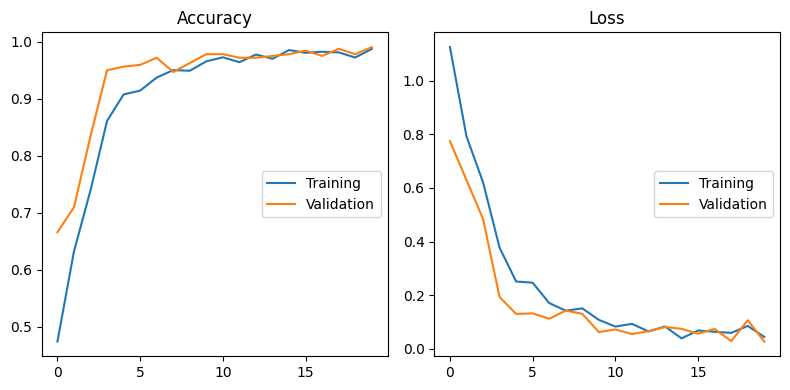

In [ ]:
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS),acc)
plt.plot(range(EPOCHS),val_acc)
plt.legend(['Training', 'Validation'],loc='right')
plt.title('Accuracy')


plt.subplot(1,2,2)
plt.plot(range(EPOCHS),loss)
plt.plot(range(EPOCHS),val_loss)
plt.legend(['Training', 'Validation'],loc='right')
plt.title('Loss')
plt.tight_layout()
plt.show()

first image to predict
first image's actual label: Potato___Early_blight
1/1 [==============================] - 0s 199ms/step
Predicted label: Potato___Early_blight


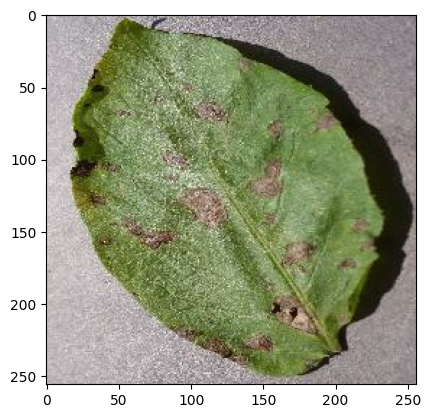

In [ ]:
for images_batch,labels_batch in test_ds.take(1):
 first_image=images_batch[0].numpy().astype('uint8')
 first_label=labels_batch[0].numpy()
 print("first image to predict")
 plt.imshow(first_image)
 print("first image's actual label:",class_names[first_label])
 batch_prediction=model.predict(images_batch)
 print("Predicted label:",class_names[np.argmax(batch_prediction[0])])

In [ ]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 [==============================] - 0s 27ms/step


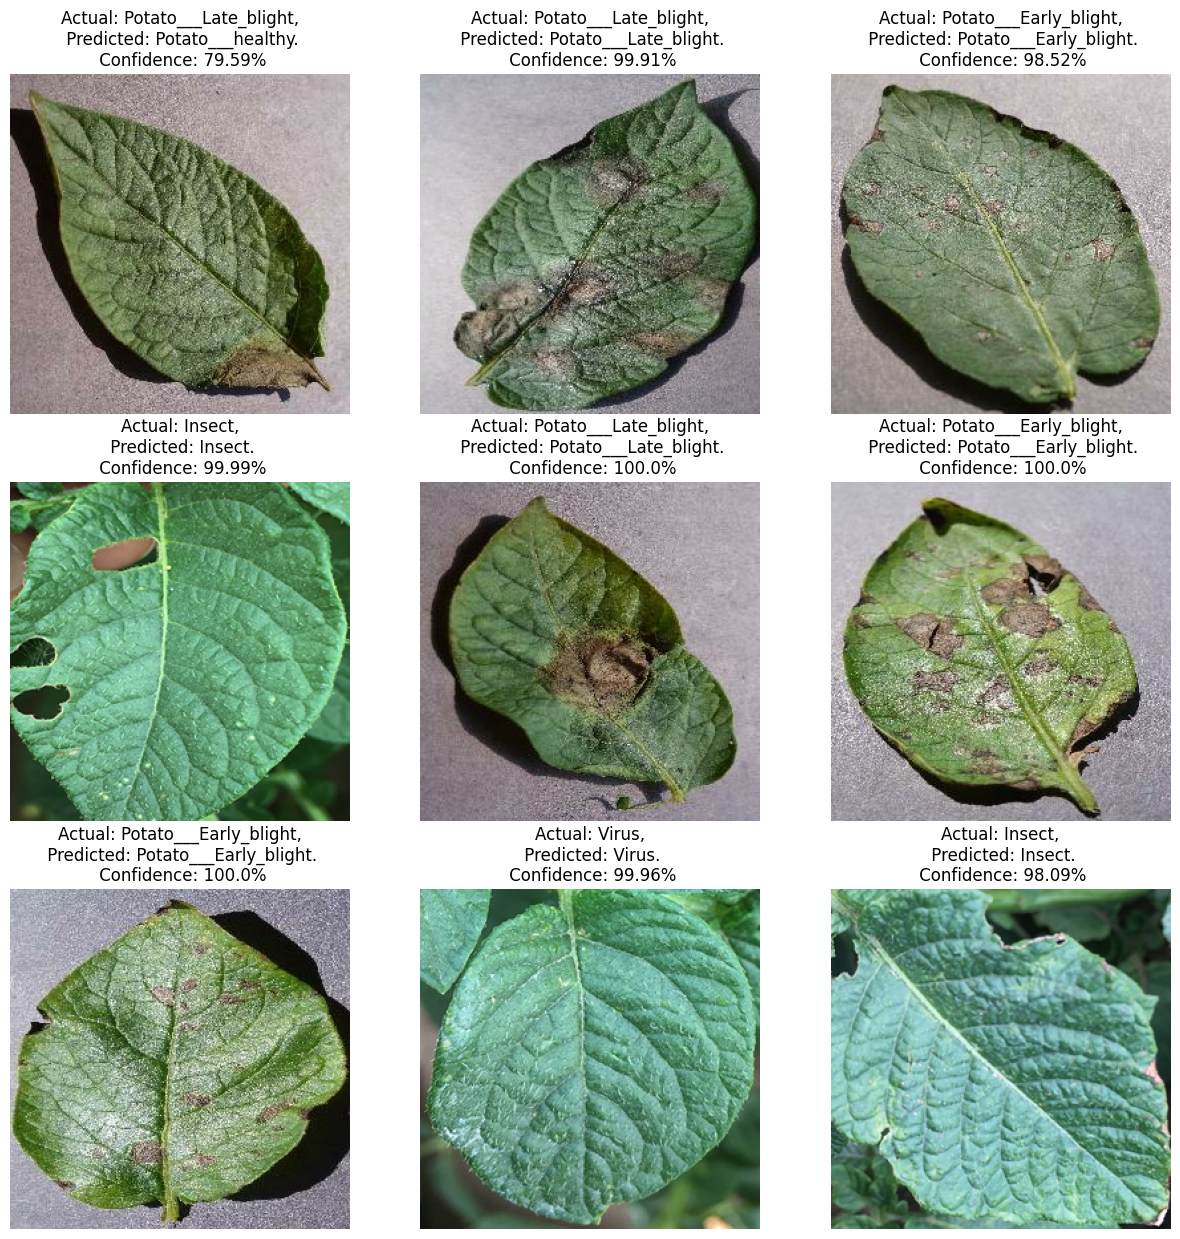

In [ ]:
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))

        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]]

        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")

        plt.axis("off")

In [ ]:
# Import scikit-learn for F1 score calculation
from sklearn.metrics import f1_score

# Assuming you have already trained your model and have a validation dataset val_ds

# Make predictions on the validation data
y_true = []  # True labels
y_pred = []  # Predicted labels

for x, labels in val_ds:
    y_true.extend(labels.numpy())
    predictions = model.predict(x)
    y_pred.extend(predictions.argmax(axis=1))

# Calculate the F1 score
f1 = f1_score(y_true, y_pred, average='weighted')  # Use 'weighted' for multiclass classification

print("Weighted F1 Score:", f1)

1/1 [==============================] - 0s 32ms/step
Weighted F1 Score: 0.9905069444444445


In [ ]:
# Import scikit-learn for precision calculation
from sklearn.metrics import precision_score

# Assuming you have already trained your model and have a validation dataset val_ds

# Make predictions on the validation data
y_true = []  # True labels
y_pred = []  # Predicted labels

for x, labels in val_ds:
    y_true.extend(labels.numpy())
    predictions = model.predict(x)
    y_pred.extend(predictions.argmax(axis=1))

# Calculate the precision
precision = precision_score(y_true, y_pred, average='weighted')  # Use 'weighted' for multiclass classification

print("Weighted Precision:", precision)

1/1 [==============================] - 0s 40ms/step
Weighted Precision: 0.9910027472527473


In [ ]:
model.save('model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
